04. ELEMENTS PRESENTATION

In [1]:
#imports
import os
import sys
sys.path.append(os.getenv("PROJECT_PATH"))

from utils.drawpitch import draw_pitch, draw_points_on_pitch,draw_paths_on_pitch
from utils.pitchconfig import SoccerPitchConfiguration

import pandas as pd
import numpy as np
import supervision as sv
import ast
import matplotlib.pyplot as plt
import cv2

df = pd.read_csv("../../data/train/ss1.csv")

In [2]:
#Supervision - virtualization
CONFIG = SoccerPitchConfiguration()

edge_annotator = sv.EdgeAnnotator(
    color=sv.Color.from_hex('#00BFFF'),
    thickness=2, edges=CONFIG.edges)
vertex_annotator = sv.VertexAnnotator(
    color=sv.Color.from_hex('#FF1493'),
    radius=8)
vertex_annotator_2 = sv.VertexAnnotator(
    color=sv.Color.from_hex('#00BFFF'),
    radius=8)

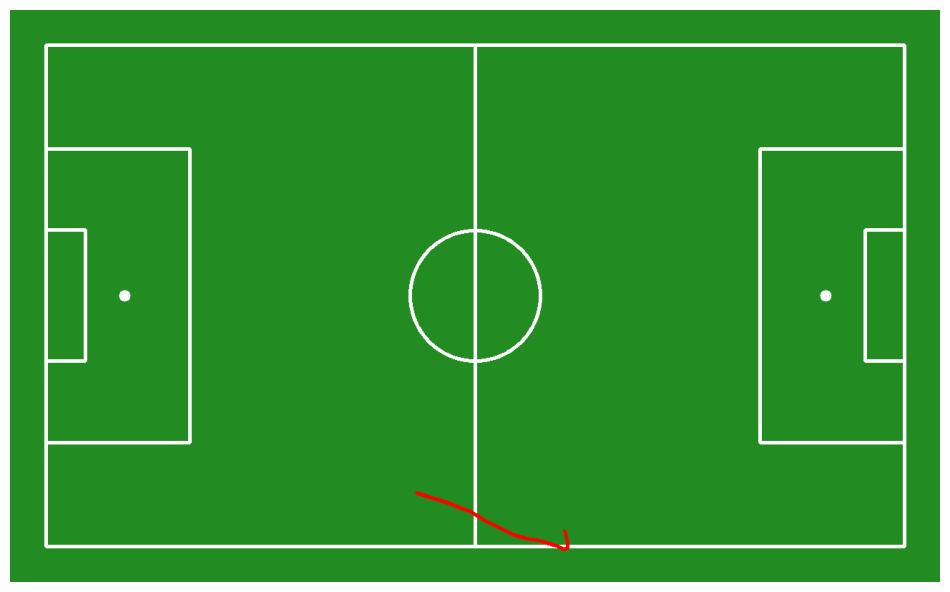

In [3]:
#Trajectory of the ball
CONFIG = SoccerPitchConfiguration()

annotated_frame = draw_pitch(CONFIG)

ball_xy = df['ball'].apply(ast.literal_eval).to_list()
pitch_ball_xy = np.array(ball_xy)

# Draw pitch and plot ball positions
annotated_frame = draw_pitch(CONFIG)
annotated_frame = draw_paths_on_pitch(
    config=CONFIG,
    paths=[pitch_ball_xy],  # List of paths, each path is an array of points
    color=sv.Color.RED,
    thickness=4,
    pitch=annotated_frame
)

sv.plot_image(annotated_frame)

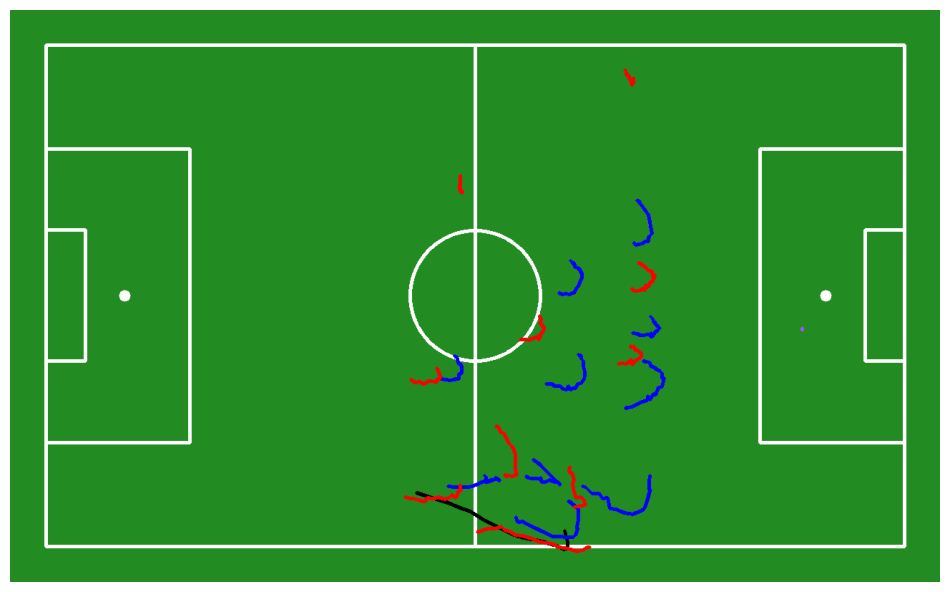

In [8]:
# ...existing code...

CONFIG = SoccerPitchConfiguration()
annotated_frame = draw_pitch(CONFIG)

# Define colors for each entity
trajectory_color_team_0 = sv.Color.RED
trajectory_color_team_1 = sv.Color.BLUE
ball_color = sv.Color.BLACK

for col in df.columns:
    if col == 'frame_index':
        continue
    # Drop NaN values and replace semicolons with commas before evaluating
    col_xy = (
        df[col]
        .dropna()
        .str.replace(';', ',')
        .apply(ast.literal_eval)
        .to_list()
    )
    pitch_col_xy = np.array(col_xy)
    # Assign color based on column name
    if col == 'ball':
        color = ball_color
    elif 'team_0' in col:
        color = trajectory_color_team_0
    elif 'team_1' in col:
        color = trajectory_color_team_1
    else:
        color = sv.Color.ROBOFLOW  #goalkeeper
    annotated_frame = draw_paths_on_pitch(
        config=CONFIG,
        paths=[pitch_col_xy],
        color=color,
        thickness=4,
        pitch=annotated_frame
    )

sv.plot_image(annotated_frame)
# ...existing code...